TelCo is very concerned about the its customers discontinuing with the service and opting to move to the one provided by the competitors. It is a major phenomenon in the service industry and is called ‘Churn’.  The company thinks that there are early indications available in the way a customer uses its service in predicting whether he/she is likely to churn. The file churn.csv contains some of the measures tracked by the company to see if it can predict the customers who are likely to churn and then take proactive action. It is your task to perform exploratory data analysis on this data and ascertain if the data still has power to predict churn. If indeed such power exists, which variables have the capability to predict churn.

Attribute information:

Account.Length: how long account has been active.

VMail.Message: Number of voice mail messages send by the customer.

Day.Mins: Time spent on day calls.

Eve.Mins: Time spent on evening calls.

Night.Mins: Time spent on night calls.

Intl. Mins: Time spent on international calls.

Day.Calls: Number of day calls by customers.

Eve.Calls: Number of evening calls by customers.

Intl.Calls: Number of international calls.

Night.Calls: Number of night calls by customer.

Day.Charge: Charges of Day Calls.

Night.Charge: Charges of Night Calls.

Eve.Charge: Charges of evening Calls.

Intl.Charge: Charges of international calls.

VMail.Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area.Code: Area Code of customer.

Int.l.Plan: Does customer have international plan or not.

CustServ.Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)


Steps:

Pre-processing, EDA and removing of outliers from data (2.5 points)
Use Decision tree and optimize the depth of the tree and leaf nodes (hyper parameters tuning) to come up with the best model (7.5 points)
Over the same decision tree model apply gradient boosting and check the precision/ recall (7.5 points)
Apply Random forest method over the model and print the confusion matrix (5 points)
Tabulate the accuracy of all the 3 models and describe which model performs the best and why? (2.5 points)

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')


# Pre-processing, EDA and removing of outliers from data

In [4]:
churn_df = pd.read_csv("Churn.csv")
churn_df.tail(5)

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381
3332,74,25,234.4,265.9,241.4,13.7,0,0,0,1,...,39.85,82,22.60,77,10.86,4,3.70,TN,415,400-4344


In [5]:
churn_df.dtypes

AccountLength      int64
VMailMessage       int64
DayMins          float64
EveMins          float64
NightMins        float64
IntlMins         float64
CustServCalls      int64
Churn              int64
IntlPlan           int64
VMailPlan          int64
DayCalls           int64
DayCharge        float64
EveCalls           int64
EveCharge        float64
NightCalls         int64
NightCharge      float64
IntlCalls          int64
IntlCharge       float64
State             object
AreaCode           int64
Phone             object
dtype: object

In [6]:
missing_values=churn_df.columns[churn_df.isnull().any()]
churn_df[missing_values].isnull().sum()

Series([], dtype: float64)

### No missing values

In [7]:
df2 = churn_df.drop(["State","Phone","AreaCode"],axis=1)

### As Tree based methods are insensitive to outliers,there is no necessity to remove outliers!

In [8]:
#Find the correlation of all independent variables with dependent varible 
#and drop variables whose correlation lies in the range -0.1 to 0.1.

df3 = df2.copy()
for i in df3.columns[:-1]:
    l = df3[i].corr(df3["Churn"])
    if float(l) < -0.1 or float(l) < 0.1:
        df3.pop(i)
print(df3.columns)
print(len(df3.columns))
df3.corr()

Index(['DayMins', 'CustServCalls', 'Churn', 'IntlPlan', 'DayCharge',
       'IntlCharge'],
      dtype='object')
6


,DayMins,CustServCalls,Churn,IntlPlan,DayCharge,IntlCharge
DayMins,1.000000,-0.013423,0.205151,0.049396,1.000000,-0.010092
CustServCalls,-0.013423,1.000000,0.208750,-0.024522,-0.013427,-0.009675
Churn,0.205151,0.208750,1.000000,0.259852,0.205151,0.068259
IntlPlan,0.049396,-0.024522,0.259852,1.000000,0.049398,0.045780
DayCharge,1.000000,-0.013427,0.205151,0.049398,1.000000,-0.010094
IntlCharge,-0.010092,-0.009675,0.068259,0.045780,-0.010094,1.000000


### Through coorelation of all independent variables with 'churn', the number of columns have been reduced from 17 (independent variables) to 5 variables -  DayMins, CustServCalls, IntlPlan, DayCharge,Intlcharge

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [10]:
X = df3.drop(["Churn"],axis=1).values
y = df3["Churn"].values
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [11]:
print("Training data length:", len(X_train))
print("Test data length:", len(X_test))

Training data length: 2333
Test data length: 1000


In [12]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns.  
                           
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
test_pred = dt_model.predict(X_test)

In [16]:
print("Decision Tree Accuracy  Score:",dt_model.score(X_test , y_test))
print("Decision Tree Precision Score:",metrics.precision_score(y_test,test_pred))
print("Decision Tree Recall    Score:",metrics.recall_score(y_test,test_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, test_pred))

Decision Tree Accuracy  Score: 0.861
Decision Tree Precision Score: 0.5514705882352942
Decision Tree Recall    Score: 0.49019607843137253
Confusion Matrix:
[[786  61]
 [ 78  75]]


## Hyper parameter turning - max_depth

In [21]:
#The first parameter to tune is max_depth. This indicates how deep the tree can be. 
#The deeper the tree, the more splits it has and it captures more information about the data. 
#We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc (area under curve) scores
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.709088594115332

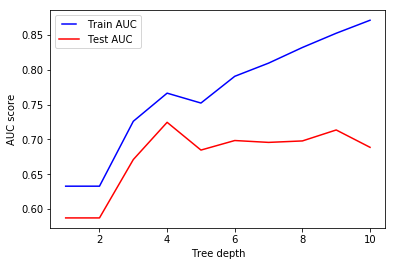

In [22]:
import matplotlib.pyplot as plt
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

### max_depth: We see that our model overfits for large depth values. The tree predicts all of the train data, however, it fails to generalize the findings for new data.

## Hyper parameter tuning - min_samples_leaf

[0.05 0.1  0.15 0.2  0.25]


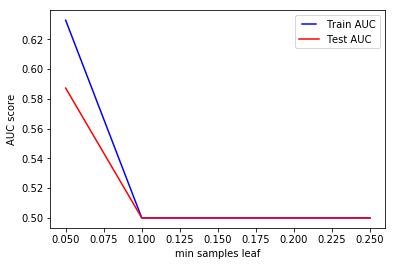

In [23]:
min_samples_leafs = np.linspace(0.05, 0.25, 5, endpoint=True)
print(min_samples_leafs)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

### min_samples_leaf: We see that our model underfits for large min_samples_leaf values.

# The optimal model considering the hyper parameters is with max_depth=6 and min_samples_leaf=1

In [24]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 6, min_samples_leaf=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
test_pred = dt_model.predict(X_test)

In [26]:
print("Regularized Decision Tree Accuracy  Score:",dt_model.score(X_test , y_test))
print("Regularized Decision Tree Precision Score:",metrics.precision_score(y_test,test_pred))
print("Regularized Decision Tree Recall    Score:",metrics.recall_score(y_test,test_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, test_pred))

Regularized Decision Tree Accuracy  Score: 0.885
Regularized Decision Tree Precision Score: 0.7638888888888888
Regularized Decision Tree Recall    Score: 0.35947712418300654
Confusion Matrix:
[[830  17]
 [ 98  55]]


In [27]:
model_scores = [[]]
model_scores = [["Regulaized DT",dt_model.score(X_test,y_test),metrics.precision_score(y_test,test_pred),metrics.recall_score(y_test,test_pred)]]

In [28]:
print(model_scores)

[['Regulaized DT', 0.885, 0.7638888888888888, 0.35947712418300654]]


# Ensemble Learning - GradientBoost

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=6)
gbcl = gbcl.fit(X_train, y_train)

In [30]:
test_pred = gbcl.predict(X_test)

In [31]:
print("GradientBoost Accuracy   Score:",gbcl.score(X_test , y_test))
print("Gradient Boost Precision Score:",metrics.precision_score(y_test,test_pred))
print("Gradient Boost Recall    Score:",metrics.recall_score(y_test,test_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, test_pred))

GradientBoost Accuracy   Score: 0.873
Gradient Boost Precision Score: 0.625
Gradient Boost Recall    Score: 0.42483660130718953
Confusion Matrix:
[[808  39]
 [ 88  65]]


In [32]:
model_scores.append(["GradientBoost",gbcl.score(X_test,y_test),metrics.precision_score(y_test,test_pred),metrics.recall_score(y_test,test_pred)])

# Ensemble Learning - Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6)
rfcl = rfcl.fit(X_train, y_train)

In [34]:
test_pred = rfcl.predict(X_test)

In [35]:
print("Random Forest Accuracy  Score:",rfcl.score(X_test , y_test))
print("Random Forest Precision Score:",metrics.precision_score(y_test,test_pred))
print("Random Forest Recall    Score:",metrics.recall_score(y_test,test_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, test_pred))

Random Forest Accuracy  Score: 0.874
Random Forest Precision Score: 0.6285714285714286
Random Forest Recall    Score: 0.43137254901960786
Confusion Matrix:
[[808  39]
 [ 87  66]]


In [36]:
model_scores.append(["Random Forest",rfcl.score(X_test,y_test),metrics.precision_score(y_test,test_pred),metrics.recall_score(y_test,test_pred)])

In [37]:
m_scores = pd.DataFrame(model_scores,columns=["Model","Accuracy","Precision","Recall"])

In [38]:
m_scores

,Model,Accuracy,Precision,Recall
0,Regulaized DT,0.885,0.763889,0.359477
1,GradientBoost,0.873,0.625000,0.424837
2,Random Forest,0.874,0.628571,0.431373


# Conclusion

## The accuracy of all the models are almost similar 

## Aggregated/ensemble models are not universally better than their "single" counterparts, they are better if and only if the single models suffer from instability.

## Regularised Decision Tree is marginally better than GradientBoost and RandomForest considering the Overall Accuracy. 

## Considering Accuracy, Precision and Recall, Random Forest model is the best fit model for the given data set. 